In [1]:
import scgen
import scanpy as sc 


Reading train data

In [4]:
train = sc.read("./tests/data/pancreas.h5ad", backup_url="https://goo.gl/V29FNk")


We need two observation labels "batch" and "cell_type" for our batch_removal procedure.
There exist a "batch" obs but no "cell_type", 
so we add it as a .obs of adata

In [5]:
train.obs["cell_type"] = train.obs["celltype"].tolist()

UMAP Visualization of the  train 

... storing 'cell_type' as categorical


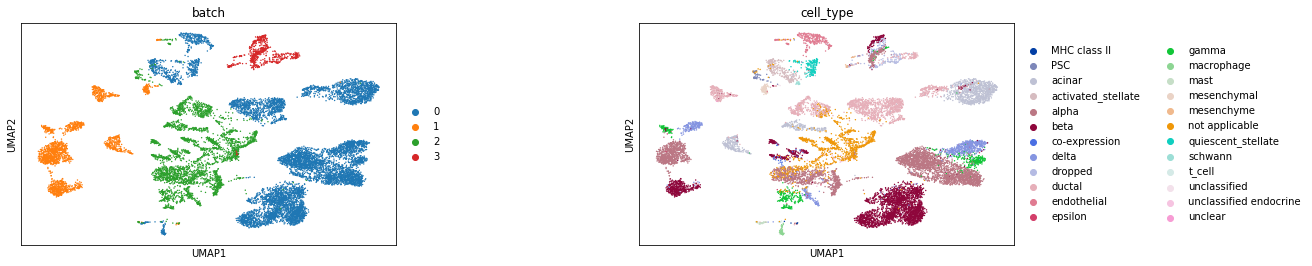

In [6]:
sc.pp.neighbors(train)
sc.tl.umap(train)
sc.pl.umap(train, color=["batch", "cell_type"], wspace=.5)

Let's now make scgen object

In [6]:
network = scgen.VAEArith(x_dimension= train.shape[1], model_path="./models/batch" )

We train the model for 100 epochs 

In [7]:
network.train(train_data=train, n_epochs=100)

Now, we pass our train adata and network object to batch_removal fucntion which
returns adata of batch corrected data

In [12]:
corrected_adata = scgen.batch_removal(network, train)

Let's see the resuls for batch_corrected data 

         Falling back to preprocessing with `sc.pp.pca` and default params.


... storing 'cell_type' as categorical
... storing 'batch' as categorical


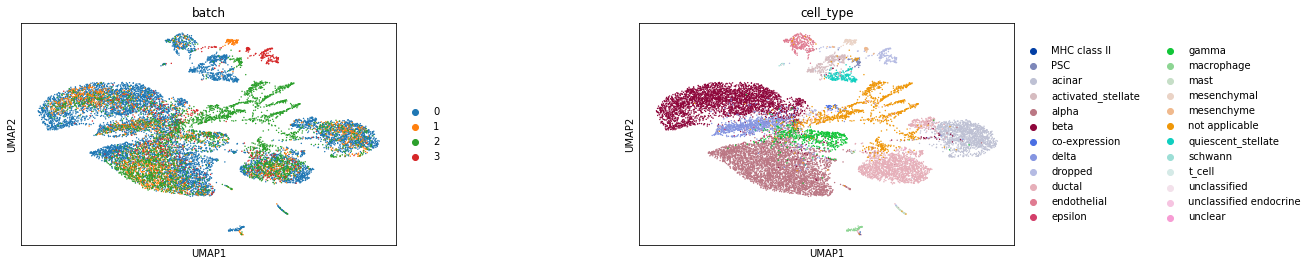

In [13]:
sc.pp.neighbors(corrected_adata)
sc.tl.umap(corrected_adata)
sc.pl.umap(corrected_adata, color=["batch", "cell_type"], wspace=.5)

In [9]:
network.sess.close()